# Filippo Conforto - RLab 04

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1

Some function are needed in order to calculate the posterior evolution.

In [2]:
user_up = function(s) {
    if (s==0) c(0,1/5,2/5,3/5,4/5,1)
    else c(1,4/5,3/5,2/5,1/5,0)
}

prob_hist = function(inp){
    prob = matrix(c(1/6,1/6,1/6,1/6,1/6,1/6))
    prob = cbind(prob,matrix(unlist(map(inp,user_up)), nrow=6))
    prob = t(apply(prob,1,cumprod))
    prob = apply(prob,2,function(x) x/sum(x))
    return(prob)
}

The following structure allows to print the posterior evolution probability given the color of randomly extracted ball. The plot is visible only at the end of the process, due to jupyter notebook kernel. The R script allows to have it plotted for each extraction.

In [5]:
inp = c()
ask = FALSE
while (ask == FALSE) {
    temp = readline("Insert the value or any key to exit (1 for black, 0 for white) ")
    if ((temp == 0) | (temp == 1)) {
        inp = c(inp,temp)
    }
    else {break}
    prob = prob_hist(inp)
    

message("Probabilities: H0:",format(prob[1,(length(inp)+1)], nsmall = 2)," H1:",format(prob[2,(length(inp)+1)], nsmall = 2)," H2:",format(prob[3,(length(inp)+1)], nsmall = 2)," H3:",format(prob[4,(length(inp)+1)], nsmall = 2)," H4:",format(prob[5,(length(inp)+1)], nsmall = 2)," H5:",format(prob[6,(length(inp)+1)], nsmall = 2))
}


Insert the value or any key to exit (1 for black, 0 for white)  0


Probabilities: H0:0.00 H1:0.06666667 H2:0.1333333 H3:0.20 H4:0.2666667 H5:0.3333333



Insert the value or any key to exit (1 for black, 0 for white)  1


Probabilities: H0:0.00 H1:0.20 H2:0.30 H3:0.30 H4:0.20 H5:0.00



Insert the value or any key to exit (1 for black, 0 for white)  9


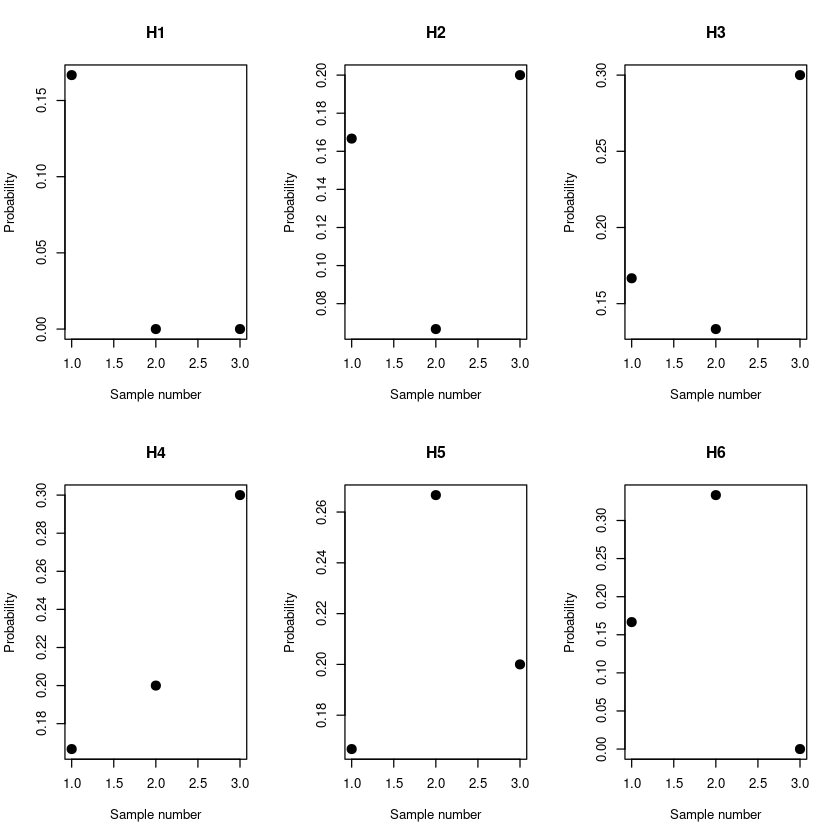

In [6]:
layout(matrix(1:6, nrow=2, ncol = 3, byrow = TRUE))
for (i in 1:6){
    plot(1:(length(inp)+1), prob[i,0:(length(inp)+1)], main = paste0("H",i), xlab="Sample number", ylab="Probability", pch = 19, cex = 1.5)
    }

## Exercise 2

In the same way a random box can be extracted and the sampling procedure can be automatic and the inference procedure can be seen as in the previous case. Again, the plot is done only at the end, but it can be see at each iteration using a R script.

In [7]:
h1 = c(1,1,1,1,1)
h2 = c(1,1,1,1,0)
h3 = c(1,1,1,0,0)
h4 = c(1,1,0,0,0)
h5 = c(1,0,0,0,0)
h6 = c(0,0,0,0,0)
boxes = list(h1,h2,h3,h4,h5,h6)

In [4]:
box = sample(1:6,1, replace = TRUE)
message("The extracted box is ",paste0("H",box))

The extracted box is H4



In [9]:
inp = c()
ask = FALSE
while (ask == FALSE) {
    temp = readline("Insert 0 to continue any key to exit ")
    if ((temp == 0)) {
        inp = c(inp,sample(boxes[[box]],size=1, replace = TRUE))
    }
    else {break}
    prob = prob_hist(inp)
    if (inp[[length(inp)]] == 1)message("Extracted black")
    else message("Extracted white")
    

message("Probabilities: H0:",format(prob[1,(length(inp)+1)], nsmall = 2)," H1:",format(prob[2,(length(inp)+1)], nsmall = 2)," H2:",format(prob[3,(length(inp)+1)], nsmall = 2)," H3:",format(prob[4,(length(inp)+1)], nsmall = 2)," H4:",format(prob[5,(length(inp)+1)], nsmall = 2)," H5:",format(prob[6,(length(inp)+1)], nsmall = 2))
}


Insert 0 to continue any key to exit  0


Extracted black

Probabilities: H0:0.3333333 H1:0.2666667 H2:0.20 H3:0.1333333 H4:0.06666667 H5:0.00



Insert 0 to continue any key to exit  0


Extracted black

Probabilities: H0:0.4545455 H1:0.2909091 H2:0.1636364 H3:0.07272727 H4:0.01818182 H5:0.00



Insert 0 to continue any key to exit  9


In [10]:
prob = prob_hist(inp)

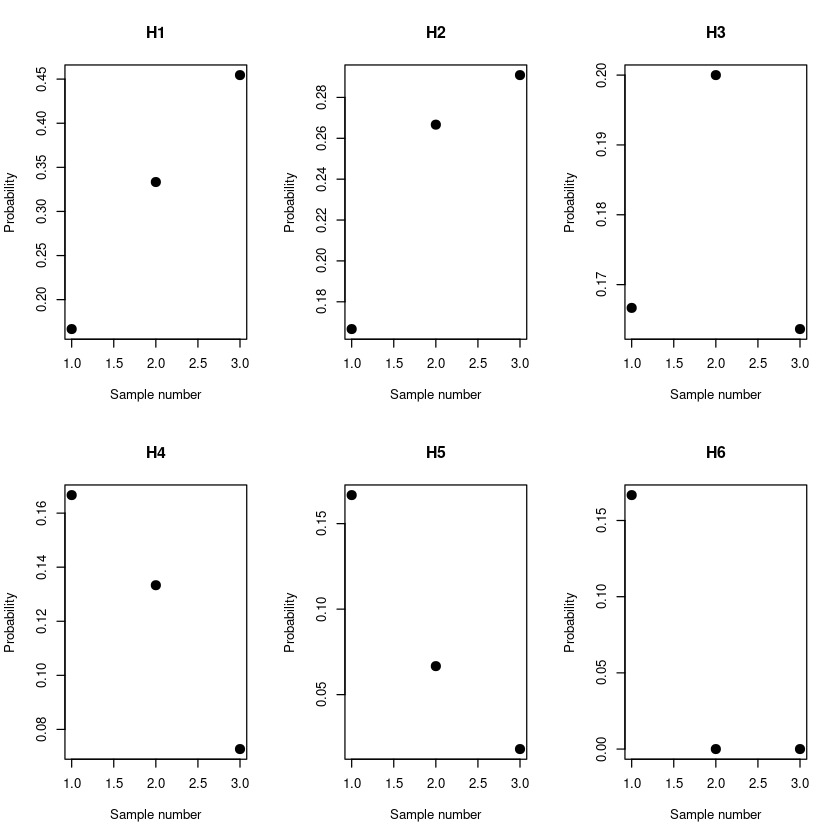

In [11]:
layout(matrix(1:6, nrow=2, ncol = 3, byrow = TRUE))
for (i in 1:6){
    plot(1:(length(inp)+1), prob[i,0:(length(inp)+1)], main = paste0("H",i), xlab="Sample number", ylab="Probability", pch = 19, cex = 1.5)
    }

## Exercise 3

Using the function rgamma is possible to sample from a gamma distribution, and given a integer value for the parameter $\alpha$ it becomes an Erlang distribution

Given a $\beta$  and $\alpha = m$ fixed, the reproductive property for an Erlang distribution can be demonstrated both with exponential distributions and uniform distributions

$$\mathcal{Y} \sim Gamma(m,\beta) = \sum_{j=1}^m \mathcal{X_j} \quad \mathcal{X_j} \sim \exp{(\beta)} $$
$$\mathcal{Y} \sim Gamma(m,\beta) = \sum_{j=1}^m -\frac{1}{\beta}\log{\mathcal{X_j}} \quad \mathcal{X_j} \sim \mathcal{U(0,1)} $$

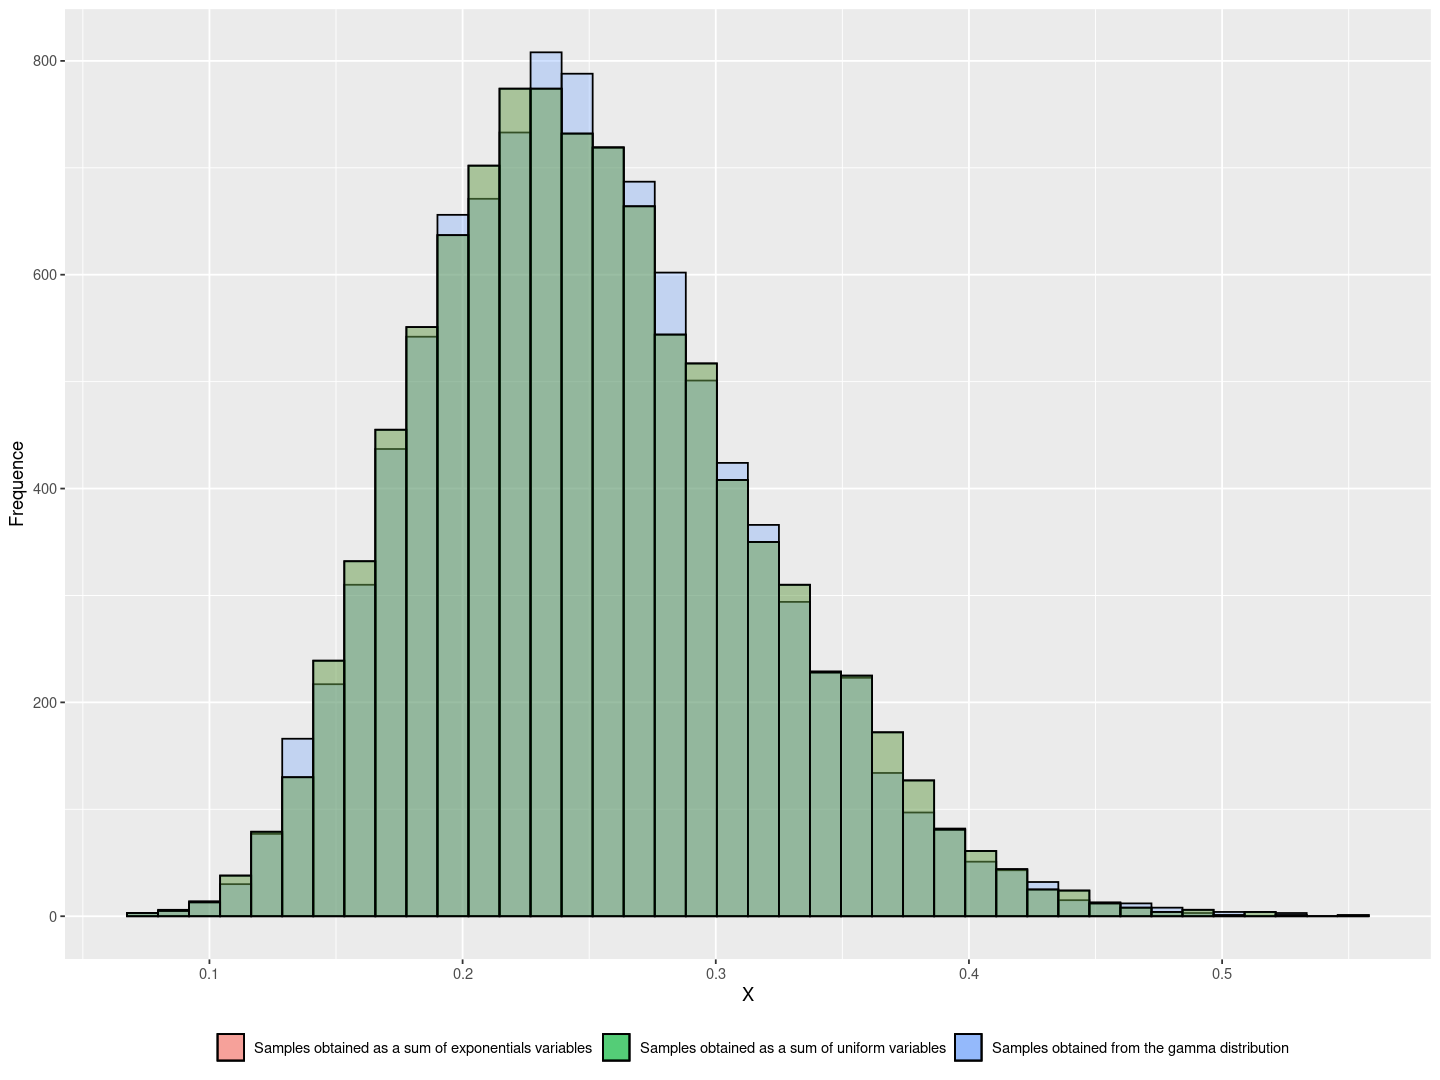

In [3]:
#Testing values
alpha = 15
beta = 60
#Standard sampling with R
erl_samp = rgamma(10000,alpha, beta)
#Sampling using a sum of exponential samples
exp_samp = matrix(rexp(150000, beta), nrow = 10000, ncol = 15) 
exp_samp = apply(exp_samp,1,sum)
#Sampling using a sum of logarithm over samples obtained from a uniform distribution
log_samp = matrix(runif(150000, min=0, max=1), nrow = 10000, ncol = 15) 
log_samp = apply(-log(log_samp)/60,1,prod)
options(repr.plot.width=12, repr.plot.height=9)

ggplot() + 
    geom_histogram( aes(x = exp_samp,fill = "Samples obtained from the gamma distribution", color = "Samples obtained from the gamma distribution"), alpha = 0.3, bins = 40) +
    geom_histogram( aes(x = erl_samp,fill = "Samples obtained as a sum of exponentials variables", color = "Samples obtained as a sum of exponentials variables"), alpha = 0.3, bins = 40) +
    geom_histogram( aes(x = erl_samp,fill = "Samples obtained as a sum of uniform variables", color = "Samples obtained as a sum of uniform variables"), alpha = 0.3, bins = 40) +
    labs( x="X", y= "Frequence", color = "", fill = "") +
    scale_color_manual(values = c("black", "black","black")) +
    theme(legend.position="bottom")


## Exercise 4

In order to extract a serie of random values `r_von_n` is defined. This function evaluates the square of a number and removes an equal number of digits from both the sides of it in order to get a random value with the same number of digits of the seed.

If the difference in length is odd, then the number of digits removed is higher for the right part of the final number

In [13]:
r_von_n = function(seed){
    len = length(unlist(strsplit(as.character(seed),"")))
    number <- unlist(strsplit(as.character(seed^2),""))
    len2 = length(number)
    if ((len2 - len)%%2 == 0){
        number = number[((len2 - len)/2+1):(len2-(len2 - len)/2)]    
    }
    else{ 
        number = number[((len2 - len+1)/2):(len2-(len2 - len+1)/2)]
    }
    return(as.numeric(paste(number, collapse="")))
}


A simple example of how the algorithm can work

In [14]:
sapply(12:27,r_von_n)
sapply(120:135,r_von_n)
sapply(1200:1215,r_von_n)

[1] 14 16 19 22 25 28 32 36 40 44 48 52 57 62 67 72

[1] 440 464 488 512 537 562 587 612 638 664 690 716 742 768 795 822

[1] 4400 4424 4448 4472 4496 4520 4544 4568 4592 4616 4641 4665 4689 4713 4737
[16] 4762